# Assignment 2: Download and Explore Citi Bike Data

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
path = "https://s3.amazonaws.com/tripdata/JC-201707-citibike-tripdata.csv.zip"
df = pd.read_csv(path, compression='zip')

In [7]:
df.head(10)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,340,2017-07-01 00:00:08,2017-07-01 00:05:48,3186,Grove St PATH,40.719586,-74.043117,3267,Morris Canal,40.712419,-74.038526,29643,Subscriber,1994.0,2
1,439,2017-07-01 00:02:35,2017-07-01 00:09:55,3183,Exchange Place,40.716247,-74.033459,3199,Newport Pkwy,40.728745,-74.032108,29585,Subscriber,1980.0,1
2,186,2017-07-01 00:04:33,2017-07-01 00:07:40,3186,Grove St PATH,40.719586,-74.043117,3270,Jersey & 6th St,40.725289,-74.045572,29219,Subscriber,1984.0,1
3,442,2017-07-01 00:05:53,2017-07-01 00:13:15,3195,Sip Ave,40.730743,-74.063784,3193,Lincoln Park,40.724605,-74.078406,29497,Subscriber,1969.0,1
4,170,2017-07-01 00:07:54,2017-07-01 00:10:45,3187,Warren St,40.721124,-74.038051,3186,Grove St PATH,40.719586,-74.043117,29483,Subscriber,1986.0,1
5,189,2017-07-01 00:08:06,2017-07-01 00:11:16,3187,Warren St,40.721124,-74.038051,3186,Grove St PATH,40.719586,-74.043117,29477,Subscriber,1990.0,1
6,421,2017-07-01 00:09:03,2017-07-01 00:16:04,3267,Morris Canal,40.712419,-74.038526,3202,Newport PATH,40.727224,-74.033759,29643,Subscriber,1985.0,2
7,494,2017-07-01 00:14:10,2017-07-01 00:22:25,3202,Newport PATH,40.727224,-74.033759,3269,Brunswick & 6th,40.726012,-74.050389,29505,Subscriber,1984.0,1
8,152,2017-07-01 00:20:25,2017-07-01 00:22:58,3211,Newark Ave,40.721525,-74.046305,3278,Monmouth and 6th,40.725685,-74.048790,26159,Subscriber,1972.0,1
9,537,2017-07-01 00:29:22,2017-07-01 00:38:19,3199,Newport Pkwy,40.728745,-74.032108,3209,Brunswick St,40.724176,-74.050656,26170,Subscriber,1994.0,1


### Explore relationship between Age and Trip Duration

In [62]:
df["age"] = 2017 - df["birth year"]
age_tripDuration = df[["age", "tripduration"]]
age_tripDuration.head(10)

,age,tripduration
0,23.0,340
1,37.0,439
2,33.0,186
3,48.0,442
4,31.0,170
5,27.0,189
6,32.0,421
7,33.0,494
8,45.0,152
9,23.0,537


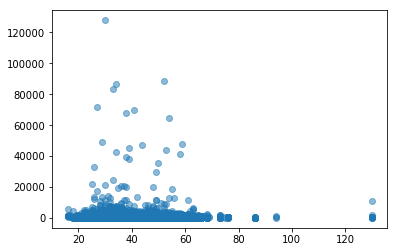

In [65]:
plt.plot(age_tripDuration.age, age_tripDuration.tripduration, "o", alpha = 0.5);

## Develop Hypothesis

#### Question:
Does gender have an impact on ride duration (in secondes)?

#### Null Hypothesis:
The average trip duration of male rider is the same or longer than the ones by female riders

#### Alternative Hypothesis:
The average trip duration in seconds of male rider is lower than female riders' with a confidence threashold of 95% (Z score > 2)

# Perform a Z Test 

<div id = "z_value" > $Z = \frac{(u_f - u_m) \sqrt N_f}{std_f}$ </div>
where 
- $u_f$ is the mean of female trip duration
- $u_m$ is the mean of trip duration by male riders
- $N_f$ is the total number of observation of trips by female riders
- $std_f$ is the standard deviation of trip duration by female riders

In [29]:
meanDurationM = df.loc[df.gender ==1]['tripduration'].mean()
meanDurationF = df.loc[df.gender ==2]['tripduration'].mean()
N = len(df.loc[df.gender ==2])
std = df.loc[df.gender ==2]['tripduration'].std()

z = (meanDurationF-meanDurationM)*np.sqrt(N)/std

In [26]:
print("the average duration for male: " + str(meanDurationM))

the average duration for male: 571.872744417


In [27]:
print("the average duration for female: " + str(meanDurationF))

the average duration for female: 665.711852576


In [30]:
print("the number of trips by female: " + str(N))

the number of trips by female: 7163


In [28]:
print("The Z-Value is: " + str(z))

The Z-Value is: 3.85903794446


### Observation

The z-value is larger than the reuqired threshold of 2. The Null Hypothesis is rejected. Therefore, there is a statistical significance in trip duration by the gender. 